<a href="https://colab.research.google.com/github/ninaaulia/EDA/blob/main/Happiness_report_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What makes the world’s happiest countries so happy? 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

sns.set()

In [2]:
df = pd.read_csv('world-happiness-report-2021.csv')
df.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [3]:
df.tail()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
144,Lesotho,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,-0.131,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800
145,Botswana,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,-0.246,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648
146,Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,0.061,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095
147,Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,-0.047,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205
148,Afghanistan,South Asia,2.523,0.038,2.596,2.449,7.695,0.463,52.493,0.382,-0.102,0.924,2.43,0.370,0.000,0.126,0.000,0.122,0.010,1.895


In [4]:
df.drop(['Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
        'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'], axis=1, inplace = True)

In [5]:
df.columns

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia'],
      dtype='object')

| Column | Description |
| :- | -: |
|Ladder score |Happiness score |
|Logged GDP per capita |The GDP-per-capita|
|Social support|Social support refers to assistance or support provided by members of social networks to an individual|
|Healthy life expectancy| the average life in good health|
|Freedom to make life choices | Freedom to make life choices is the national average of binary responses to the GWP question “Are you satisfied or dissatisfied with your freedom to choose what you do with your life?”|
|Generosity | the residual of regressing national average of response to the GWP question “Have you donated money to a charity in the past month?” on GDP per capita|
|Perceptions of corruption |The measure is the national average of the survey responses to two questions in the GWP: “Is corruption widespread throughout the government or not” and “Is corruption widespread within businesses or not?”|
|Ladder score in Dystopia |Dystopia as a benchmark against which to compare contributions from each of the six factors|

## General info about dataset

In [6]:
df.info(verbose = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Columns: 10 entries, Country name to Ladder score in Dystopia
dtypes: float64(8), object(2)
memory usage: 11.8+ KB


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country name                  149 non-null    object 
 1   Regional indicator            149 non-null    object 
 2   Ladder score                  149 non-null    float64
 3   Logged GDP per capita         149 non-null    float64
 4   Social support                149 non-null    float64
 5   Healthy life expectancy       149 non-null    float64
 6   Freedom to make life choices  149 non-null    float64
 7   Generosity                    149 non-null    float64
 8   Perceptions of corruption     149 non-null    float64
 9   Ladder score in Dystopia      149 non-null    float64
dtypes: float64(8), object(2)
memory usage: 11.8+ KB


In [8]:
df.rename({'Country name': 'Country_name', 'Regional indicator': 'Regional_indicator',
            'Ladder score': 'Ladder_score','Logged GDP per capita': 'Logged_GDP_percapita', 
            'Social support': 'Social_support', 'Healthy life expectancy': 'Healthy_lifexp',
            'Freedom to make life choices': 'Freedom', 'Perceptions of corruption': 'Perceptions_of_corruption'}, 
             axis=1, inplace=True)
df.columns

Index(['Country_name', 'Regional_indicator', 'Ladder_score',
       'Logged_GDP_percapita', 'Social_support', 'Healthy_lifexp', 'Freedom',
       'Generosity', 'Perceptions_of_corruption', 'Ladder score in Dystopia'],
      dtype='object')

In [9]:
df.isnull().sum()

Country_name                 0
Regional_indicator           0
Ladder_score                 0
Logged_GDP_percapita         0
Social_support               0
Healthy_lifexp               0
Freedom                      0
Generosity                   0
Perceptions_of_corruption    0
Ladder score in Dystopia     0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df.describe()

,Ladder_score,Logged_GDP_percapita,Social_support,Healthy_lifexp,Freedom,Generosity,Perceptions_of_corruption,Ladder score in Dystopia
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,1.490000e+02
mean,5.532839,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450,2.430000e+00
std,1.073924,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226,5.347044e-15
min,2.523000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000,2.430000e+00
25%,4.852000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000,2.430000e+00
50%,5.534000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000,2.430000e+00
75%,6.255000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000,2.430000e+00
max,7.842000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000,2.430000e+00


In [12]:
df.describe(include = 'object')

,Country_name,Regional_indicator
count,149,149
unique,149,10
top,Taiwan Province of China,Sub-Saharan Africa
freq,1,36


In [13]:
df.mean()

Ladder_score                  5.532839
Logged_GDP_percapita          9.432208
Social_support                0.814745
Healthy_lifexp               64.992799
Freedom                       0.791597
Generosity                   -0.015134
Perceptions_of_corruption     0.727450
Ladder score in Dystopia      2.430000
dtype: float64

In [14]:
df.median()

Ladder_score                  5.534
Logged_GDP_percapita          9.569
Social_support                0.832
Healthy_lifexp               66.603
Freedom                       0.804
Generosity                   -0.036
Perceptions_of_corruption     0.781
Ladder score in Dystopia      2.430
dtype: float64

* `ladder score` & `Ladder score in Dystopia` are probably symmetrical distribution because the mean and median coincide.
* `Generosity` has a positive skew (right-skewed distribution).
* maximum `ladder score` or happiness score is 78.42%
* maximum `Perceptions of corruption` is 9.39% while `Generosity` is 5.42% .Which means that the average number of corruption is still higher than Generosity every month.

## Relationships between Variables

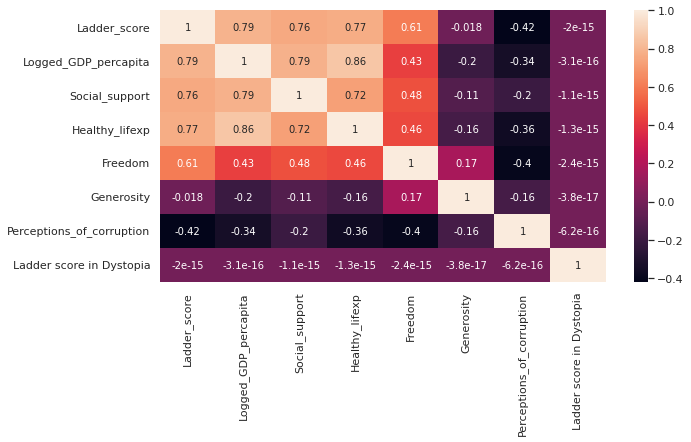

In [15]:
corr = df.corr()
plt.figure(figsize = (10,5))
sns.heatmap(corr, annot=True)
plt.show()

* Logged GDP per capita, social support, Healthy life expectancy  & ladder score has  high correlation (above 60%)
* Healthy life expectancy & Logged GDP per capita are the highest correlation (86%)
* between *generosity*,*proportion of corruption* and other variables, they have the lowest correlation

## Ladder Score ranking

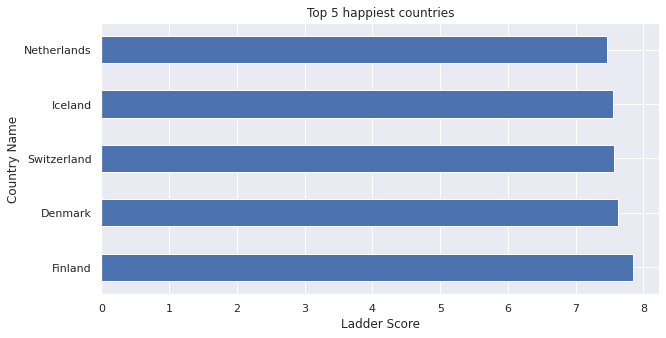

In [16]:
high_score = df.groupby('Country_name')['Ladder_score'].sum().sort_values(ascending=False)[0:5]
high_score.plot(kind='barh', figsize=(10,5))
plt.xlabel('Ladder Score')
plt.ylabel('Country Name')
plt.title('Top 5 happiest countries')
plt.show()

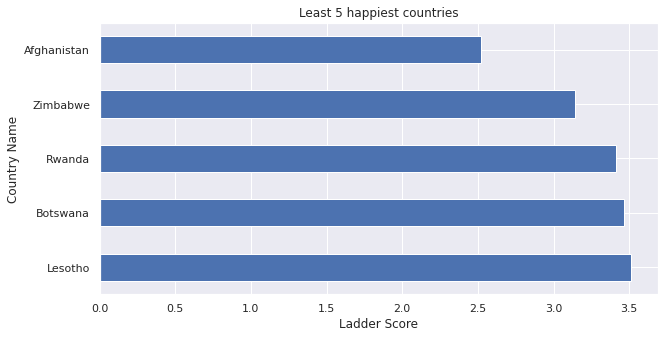

In [17]:
high_score = df.groupby('Country_name')['Ladder_score'].sum().sort_values(ascending=False)[-5:]
high_score.plot(kind='barh', figsize=(10,5))
plt.xlabel('Ladder Score')
plt.ylabel('Country Name')
plt.title('Least 5 happiest countries')
plt.show()

* `Findland` is the happiest country in 2021 while `Afghanistan` has the lowest happiness score
* The top 5 countries have above average scores Meanwhile, the bottom five countries are scores below the average

## Regions Happiness rank

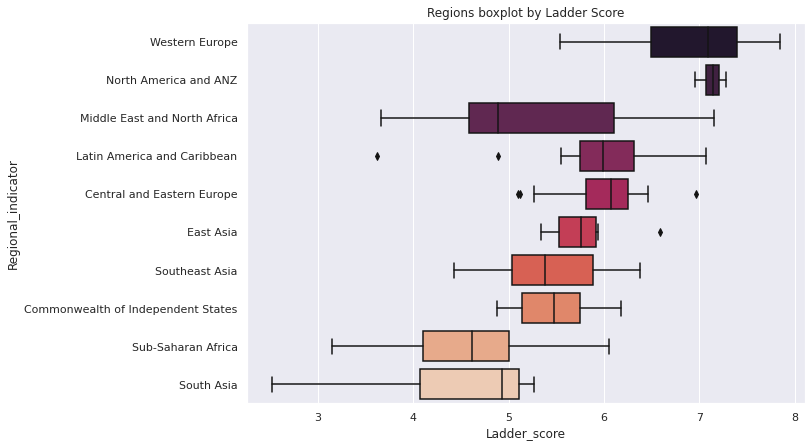

In [18]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Ladder_score', y='Regional_indicator',  orient='h', palette='rocket', data=df)
plt.title('Regions boxplot by Ladder Score')
plt.show()

* Looks like `Western europe` has a highest score and `south asia` is the lowest
* `Western Europe`, `Noth America and ANZ`, `East Asia` & `Central and eastern Europe` have a score above the average
* `Latin America and the Caribbean` also has a score above the average but with the outliers

## Logged GDP per capita and Ladder score

In [19]:
fig = px.scatter(df,
                 x='Logged_GDP_percapita', 
                 y='Ladder_score', 
                 color='Regional_indicator', 
                 trendline='ols', 
                 trendline_scope='overall')
fig.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



* The scatter plot shows that a region with a high logged GDP per capita has a higher Ladder score.
* `Western Europe` has the highest logged GDP per capita and ladder score, while `Sub-Saharan Africa` has the lowest logged GDP per capita and ladder score.

## Logged GDP per capita & Healthy life expectancy 

In [20]:
fig = px.scatter(df,
                 x='Logged_GDP_percapita', 
                 y='Healthy_lifexp', 
                 color='Regional_indicator', 
                 trendline='ols', 
                 trendline_scope='overall')
fig.show()

* Notice that a region with a high logged GDP per capita has a higher Healthy life expectancy.
* `Western Europe` has the highest logged GDP per capita and healthy life expectancy, while `Sub-Saharan Africa` has the lowest.

## Healthy life expectancy & Perceptions of corruption

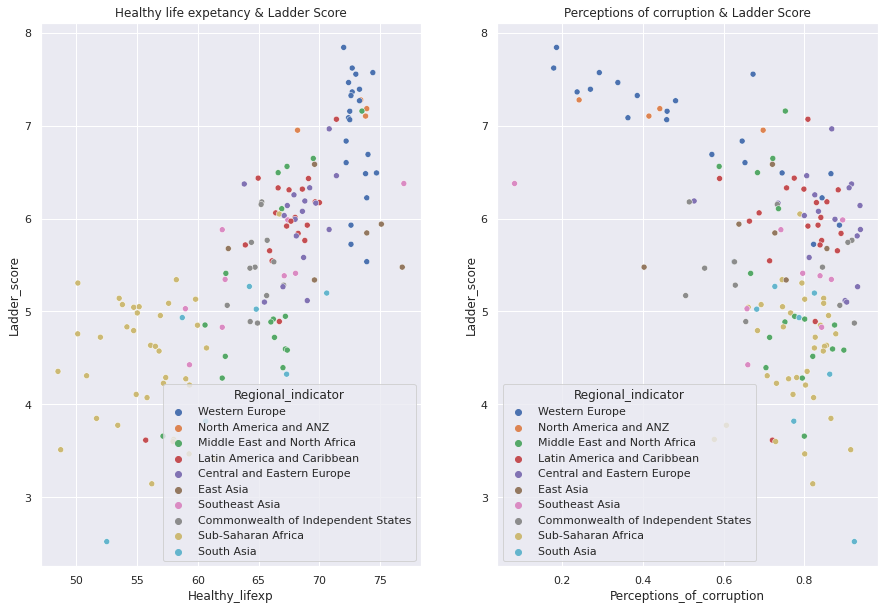

In [21]:
f = plt.figure(figsize=(15,10))
f.add_subplot(1,2,1)
ax = sns.scatterplot(x='Healthy_lifexp', y='Ladder_score', hue='Regional_indicator', data=df)
plt.title('Healthy life expetancy & Ladder Score')
ax.plot()

f.add_subplot(1,2,2)
fig = sns.scatterplot(x='Perceptions_of_corruption', y='Ladder_score', hue='Regional_indicator', data=df)
plt.title('Perceptions of corruption & Ladder Score')
plt.show()

* First, on the left side, the plot shows that the higher the value of `healthy life expectancy`, the higher the `ladder score`.
* while on the right side: plot shows that the lower absence of corruption (`preceptions_of_corruption`), `ladder score` will decrease.
* so, a region with a high `healthy life expectancy` and `preceptions_of_corruption` has a high `Ladder score`

## Perceptions of corruption and Freedom 

In [22]:
fig = px.scatter(df,
                 x='Freedom', 
                 y='Perceptions_of_corruption', 
                 color='Regional_indicator', 
                 trendline='ols', 
                 trendline_scope='overall')
fig.show()

* Perceptions_of_corruption and Freedom have a negative skewness with outliers.
* mostly `Western Europe` has high Freedom and low Perceptions_of_corruption.
* otherwise `Sub-saharan Africa` has a low Freedom and high Perceptions_of_corruption.

## Happiness Country by Health Life Expectancy

In [23]:
ax = px.sunburst(df, path=['Regional_indicator','Country_name'], values='Social_support',
                  color='Healthy_lifexp')
ax.show()

In [24]:
print('-----------------Top 5 Country by Healthy Life Expetancy ---------------------------')
df.groupby(['Country_name', 'Regional_indicator'])['Healthy_lifexp'].sum().sort_values(ascending=False)[:5]

-----------------Top 5 Country by Healthy Life Expetancy ---------------------------


Country_name               Regional_indicator
Singapore                  Southeast Asia        76.953
Hong Kong S.A.R. of China  East Asia             76.820
Japan                      East Asia             75.100
Spain                      Western Europe        74.700
Switzerland                Western Europe        74.400
Name: Healthy_lifexp, dtype: float64

* Pie chart shows that the country in `Western europe` has the higher healthy life expectancy
* while country in `Sub-saharan africa` has the lowest
* in the other region also has the lowest healthy life expectancy like Haiti, Yemen, Afganistan etc.

## Social Support, Freedom & Generosity

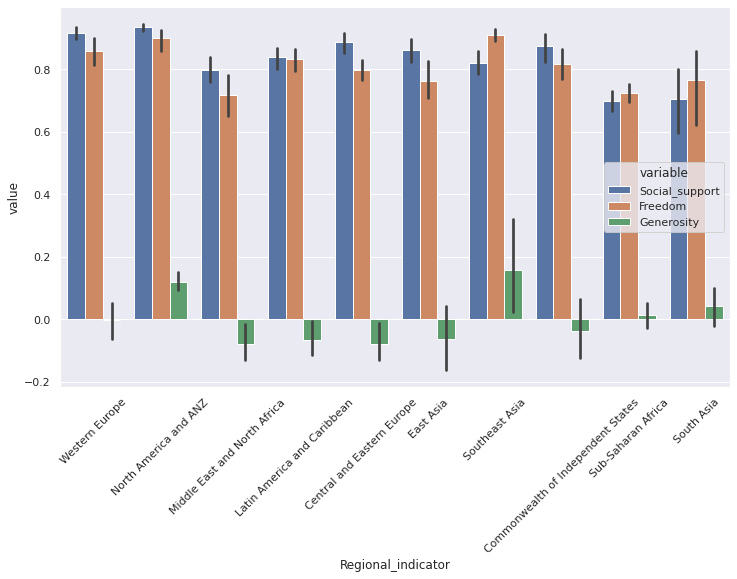

In [25]:
df_melted = df.reset_index().melt(id_vars=['Regional_indicator'],
             value_vars=['Social_support','Freedom', 'Generosity'])

# df_melted
plt.figure(figsize=[12,7])
sns.barplot(data=df_melted, x='Regional_indicator', y='value', hue='variable')
plt.xticks(rotation=45)
plt.show()

* looks like mostly Generosity in each region has negative correlations
* `Sub-saharan africa` has the lowest Social_support & Freedom
* `Southeast asia` has very high Freedom & Generosity